## Sustainable energy companies and its comparison to standard ones

In [2]:
# If yfinance library not installed
#pip install yfinance

In [3]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#import sys
import math
import datetime as dt
import yfinance as yf
import seaborn as sns
#import functools as reduce

## Loading the Data 

- to see detatiled info on data that we use, see documentation
- We will take some of the biggest renewable Energy Companies in the World and create on portfolio from them
- And we will also take some of the largest energy companies that do not focus maily on sustainable resouces
- more details: frequency: daily, historical prices, time period: last 5Y

In [4]:
# Function to extract stock data we want
def get_stock_data(tickers, num_days_back, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days = num_days_back)
    
    # Initialize a dataframe to store stock data
    df = pd.DataFrame()
    
    # For each stock, download the desired information
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end = end_date)
        df[ticker] = data[info_type]
    
    return df

### Sustainable portfolio

In [5]:
# Stocks/Tickers we want to analyze
stocks_sustainable = ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]

In [6]:
# Get Adjusted Close prices
df_sustain = get_stock_data(tickers = stocks_sustainable, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df_sustain.shape

(688, 10)

In [8]:
df_sustain.head(5) # CEG missing data

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
Date,,,,,,,,,,
2021-04-30,13.721617,37.357765,NaN,41.240002,80.489998,81.143173,47.682777,35.363224,72.762413,13.655316
2021-05-03,13.687613,37.087574,NaN,41.330002,79.540001,83.184113,48.428371,35.296249,72.002029,13.391793
2021-05-04,13.568589,36.394093,NaN,39.200001,74.510002,81.143173,47.437176,32.684193,71.053886,12.525359
2021-05-05,13.390056,36.250000,NaN,39.009998,77.199997,81.699799,48.016102,32.071842,69.260872,13.391793
2021-05-06,13.390056,35.781677,NaN,39.200001,73.589996,81.699799,48.279251,30.607944,69.476799,12.609207


In [9]:
df_sustain.describe()

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
count,688.000000,688.000000,506.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,10.117356,32.510932,83.156341,33.952485,48.081294,83.265870,43.476123,45.010584,73.621941,9.535100
std,2.925454,4.410768,21.748880,6.311504,14.208982,21.273573,3.986447,9.457271,8.066315,1.988753
min,4.935297,21.751743,41.020580,19.209999,19.629999,47.441074,33.349205,24.771481,48.921902,5.770000
25%,7.152754,29.168898,64.191925,29.572500,38.842501,67.848173,40.588195,39.254997,69.432388,8.187500
50%,11.768723,32.381615,83.265430,35.545000,45.820000,80.226650,43.410408,45.275646,73.960758,9.326565
75%,12.857246,36.289253,95.948366,38.725001,59.472500,101.360807,46.400082,52.001930,79.931822,10.263588
max,14.225992,41.188366,126.227524,47.119999,80.839996,131.229996,52.000347,72.276466,88.899979,14.653512


In [10]:
df_sustain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 688 entries, 2021-04-30 to 2024-01-24
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQN     688 non-null    float64
 1   BEPC    688 non-null    float64
 2   CEG     506 non-null    float64
 3   CSIQ    688 non-null    float64
 4   DQ      688 non-null    float64
 5   GE      688 non-null    float64
 6   IBDRY   688 non-null    float64
 7   JKS     688 non-null    float64
 8   NEE     688 non-null    float64
 9   VWDRY   688 non-null    float64
dtypes: float64(10)
memory usage: 59.1 KB


### Unsustainable portfolio

In [11]:
# Unsustainable companies tickers
stocks_unsustainable = ["EQNR", "BP", "0857.HK", "COP", "FP.VI", "SHEL", "CVX", "SR", "ENEL.MI"]

In [12]:
# Get the data -> ENEL and PETROCHINA not Found
df_unsustain = get_stock_data(tickers = stocks_unsustainable, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
df_unsustain.shape


(688, 9)

In [14]:
# Check the data
df_unsustain.head(10)

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
Date,,,,,,,,,
2021-04-30,16.853651,22.211281,2.198614,45.846596,31.018417,34.477245,92.243469,67.198761,6.831868
2021-05-03,17.103088,22.679163,2.190845,47.280991,31.435644,35.293808,94.445053,67.698257,6.905417
2021-05-04,16.970055,22.882210,2.268535,47.128582,31.861311,35.066990,94.964134,67.680428,6.781457
2021-05-05,17.443987,23.641417,2.307380,49.701519,32.910709,36.092224,97.514763,67.163101,6.850048
2021-05-06,17.543760,23.672684,2.353993,49.934608,32.940208,36.409790,97.568481,68.153145,6.831868
2021-05-07,18.142410,23.878143,2.392838,51.189701,32.847496,37.099335,98.463440,67.689331,6.832694
2021-05-10,17.942860,23.779879,2.501604,51.100040,33.134079,36.319057,98.060699,68.938057,6.837652
2021-05-11,17.776566,23.199228,2.431683,49.952530,32.421825,35.602295,95.492149,68.313683,6.664108
2021-05-12,17.643536,23.395760,2.439452,49.925640,33.285801,35.928921,96.091805,65.994644,6.604607


In [15]:
# Summary information
df_unsustain.describe()

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
count,688.000000,688.000000,654.000000,688.000000,678.000000,688.000000,688.000000,688.000000,681.000000
mean,27.076670,30.500396,3.769838,92.349247,47.422484,51.617366,139.564513,63.435807,5.525910
std,5.014529,5.224090,1.016344,23.206316,9.357003,9.137706,26.995531,4.557902,0.759860
min,15.795561,20.626505,2.190845,45.846596,29.964716,33.939934,86.570305,54.103111,3.618736
25%,23.554576,25.969353,3.039534,70.010174,39.580252,44.978562,112.273001,59.319436,5.004544
50%,28.488438,29.981976,3.310049,98.694424,47.810751,52.281462,150.324997,63.881348,5.652135
75%,31.103770,35.143364,4.909308,112.399754,54.989330,58.998783,159.225716,67.131184,6.009587
max,36.601448,40.300167,5.900000,128.852463,63.653103,67.861908,180.690475,73.165520,6.905417


In [22]:
# Info
df_unsustain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 688 entries, 2021-04-30 to 2024-01-24
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EQNR     688 non-null    float64
 1   BP       688 non-null    float64
 2   0857.HK  654 non-null    float64
 3   COP      688 non-null    float64
 4   FP.VI    678 non-null    float64
 5   SHEL     688 non-null    float64
 6   CVX      688 non-null    float64
 7   SR       688 non-null    float64
 8   ENEL.MI  681 non-null    float64
dtypes: float64(9)
memory usage: 53.8 KB


###  Potential Data preparation

In [23]:
df_sustain.isna().sum()

AQN        0
BEPC       0
CEG      182
CSIQ       0
DQ         0
GE         0
IBDRY      0
JKS        0
NEE        0
VWDRY      0
dtype: int64

In [24]:
df_sustain.loc[df_sustain.duplicated()]

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
Date,,,,,,,,,,


In [25]:
df_unsustain.isna().sum()

EQNR        0
BP          0
0857.HK    34
COP         0
FP.VI      10
SHEL        0
CVX         0
SR          0
ENEL.MI     7
dtype: int64

In [26]:
df_unsustain.loc[df_unsustain.duplicated()]

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
Date,,,,,,,,,


### Explanatory data analysis

#### Exploring sustainable porfolio 

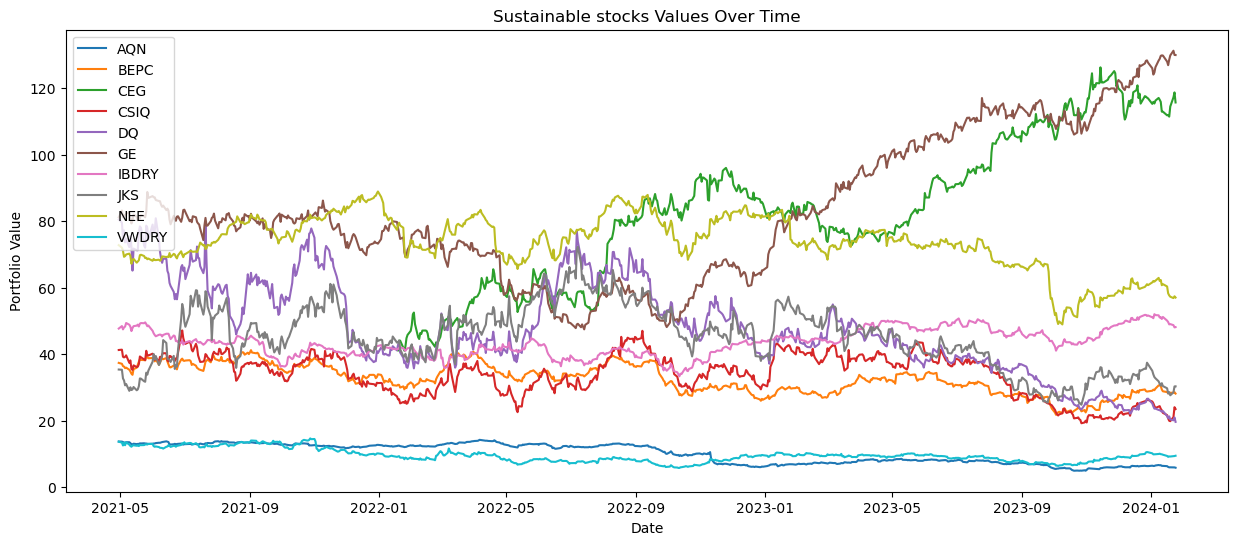

In [28]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_sustain.columns:
    plt.plot(df_sustain.index, df_sustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Sustainable stocks Values Over Time')
plt.legend()
plt.show()

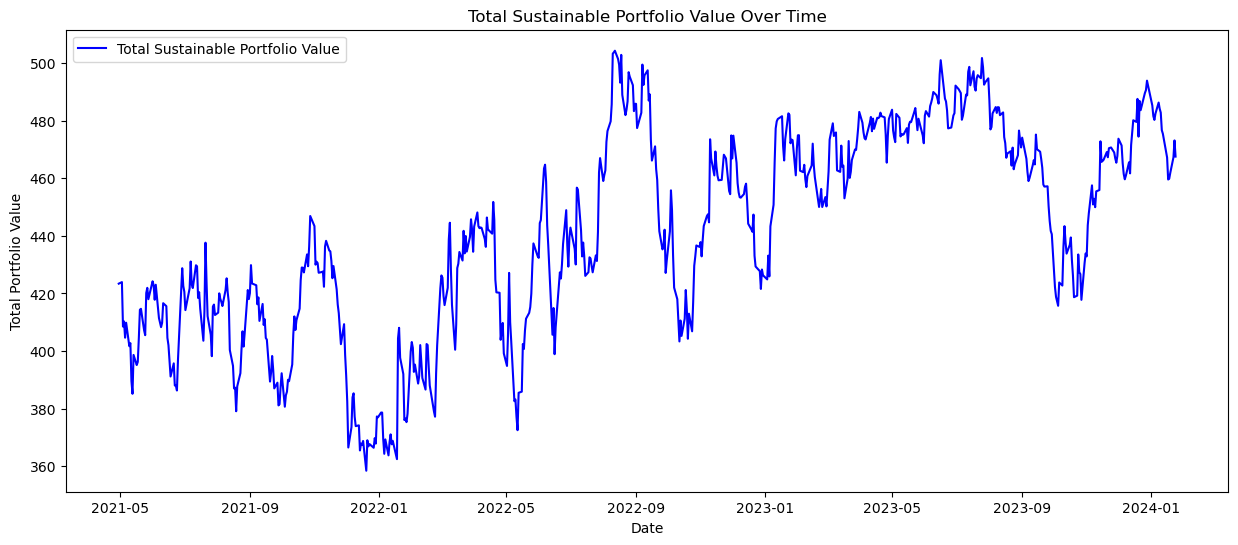

In [29]:
#graph of sustainable stocks colectively
# Summing the data across columns
total_portfolio = df_sustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_portfolio.index, total_portfolio, label='Total Sustainable Portfolio Value', color="blue")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Total Sustainable Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

### Graph for each share

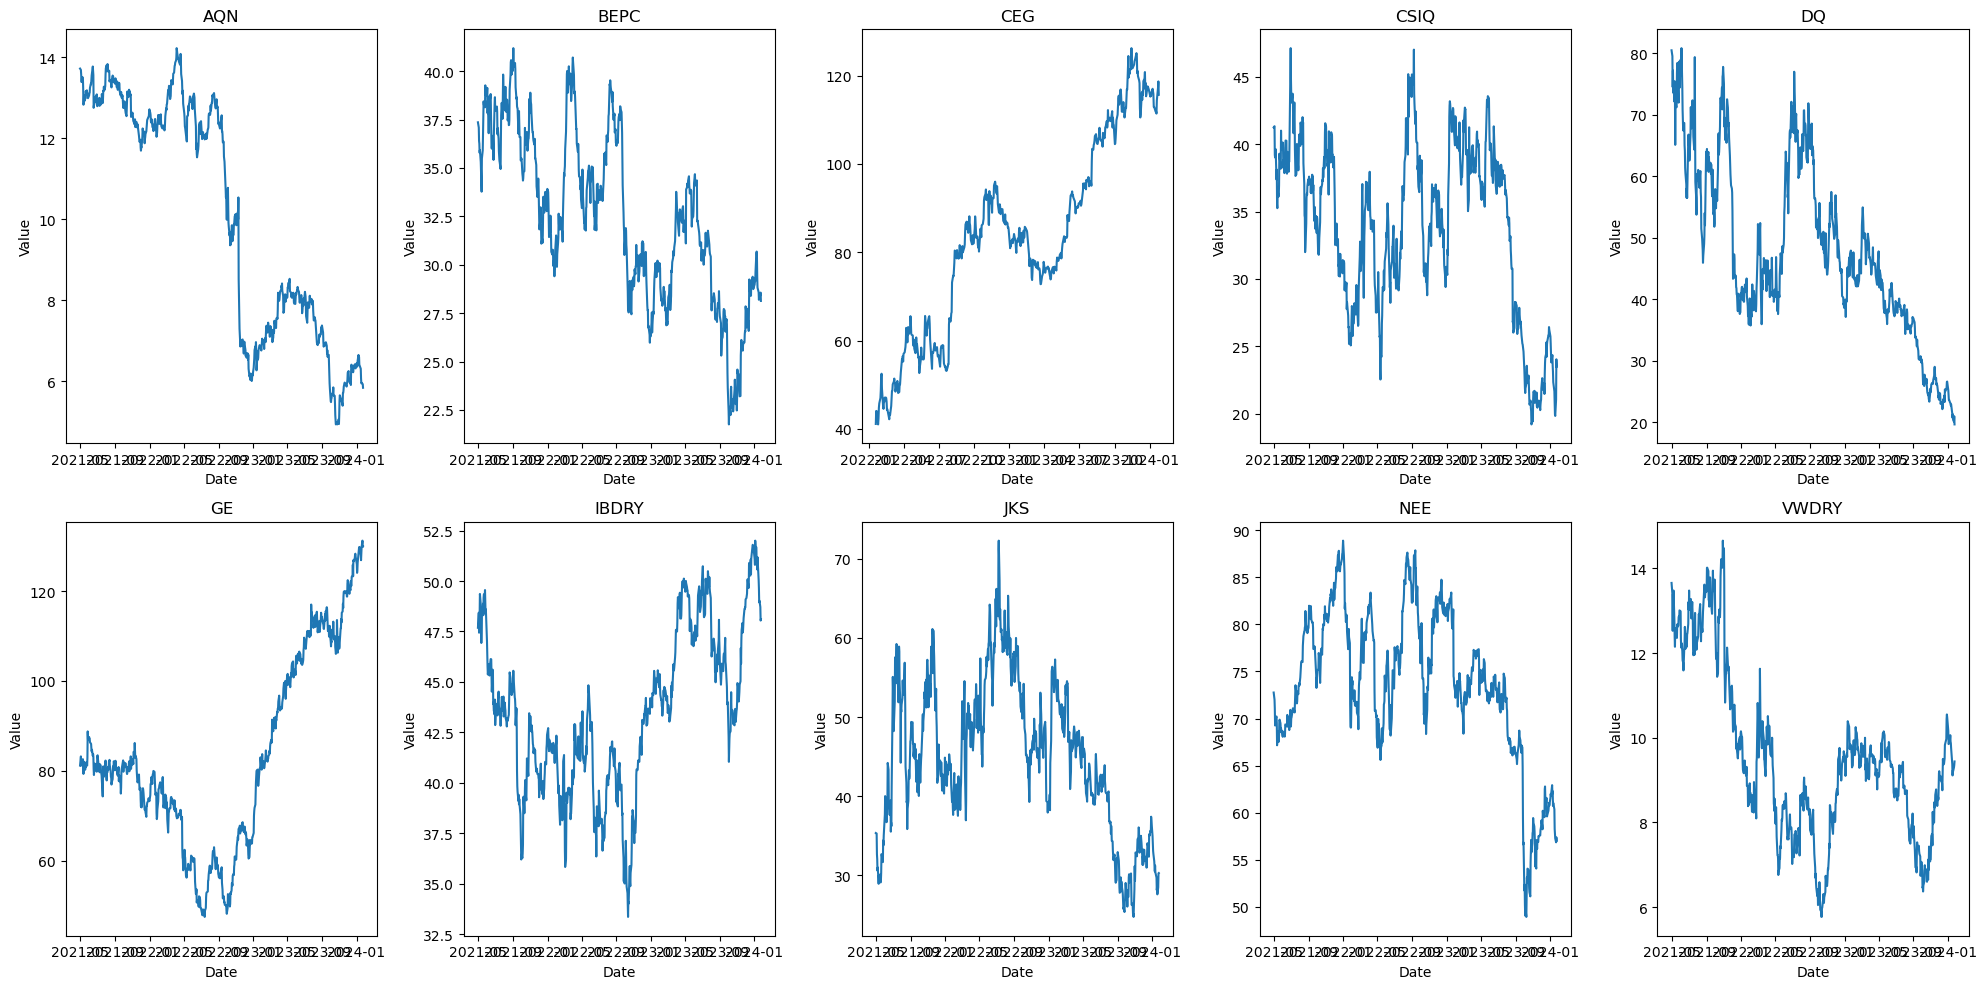

In [30]:
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_sustain.columns):
    axes[i].plot(df_sustain.index, df_sustain[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Exploring unsustainable porfolio 

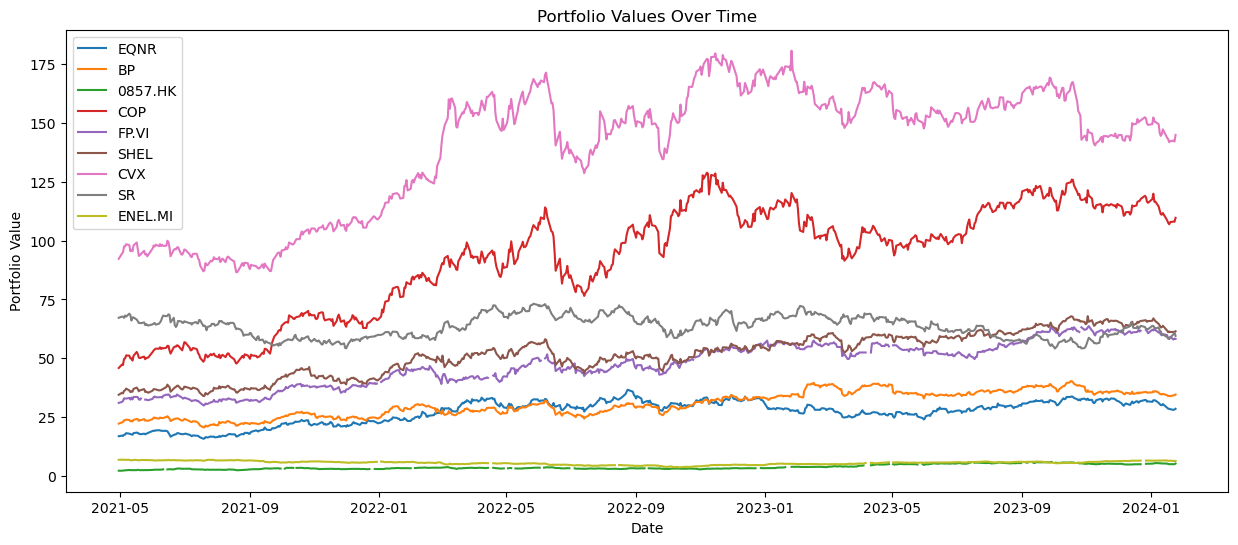

In [31]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_unsustain.columns:
    plt.plot(df_unsustain.index, df_unsustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values Over Time')
plt.legend()
plt.show()

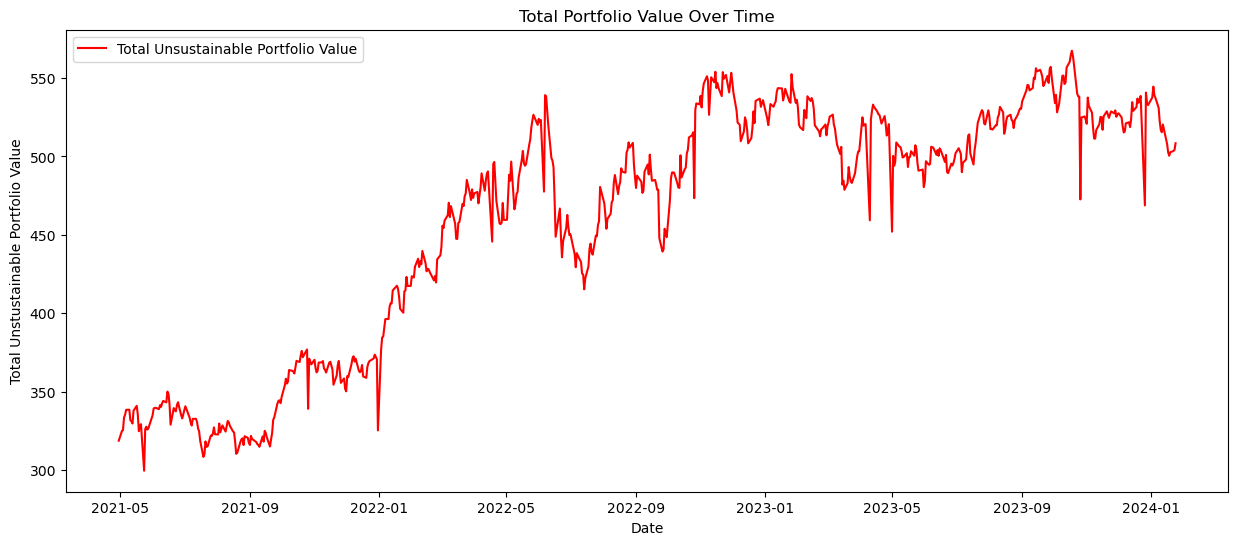

In [32]:
# Stotal portfolio
total_un_portfolio = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_un_portfolio.index, total_un_portfolio, label='Total Unsustainable Portfolio Value', color="red")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Unstustainable Portfolio Value')
plt.title('Total Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

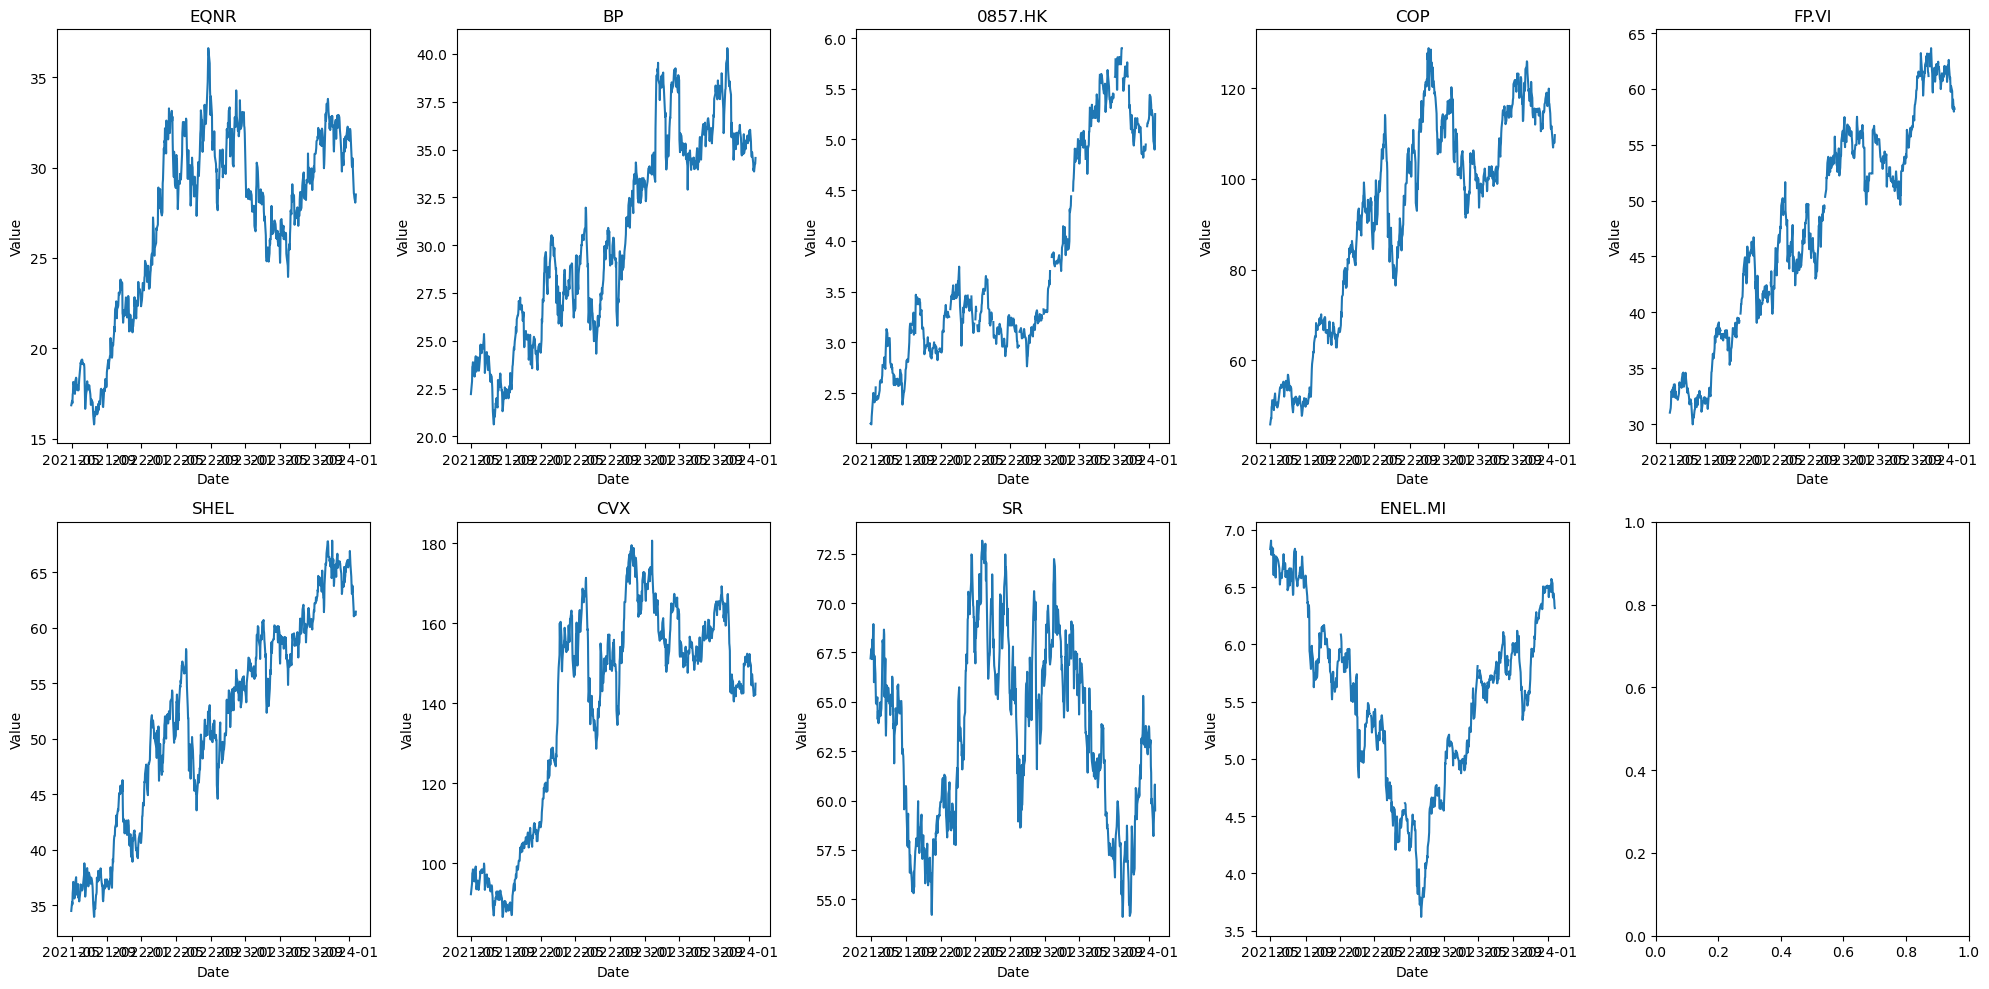

In [33]:
#to fix - the last stock
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_unsustain.columns):
    axes[i].plot(df_unsustain.index, df_unsustain[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Combination of both portfolios

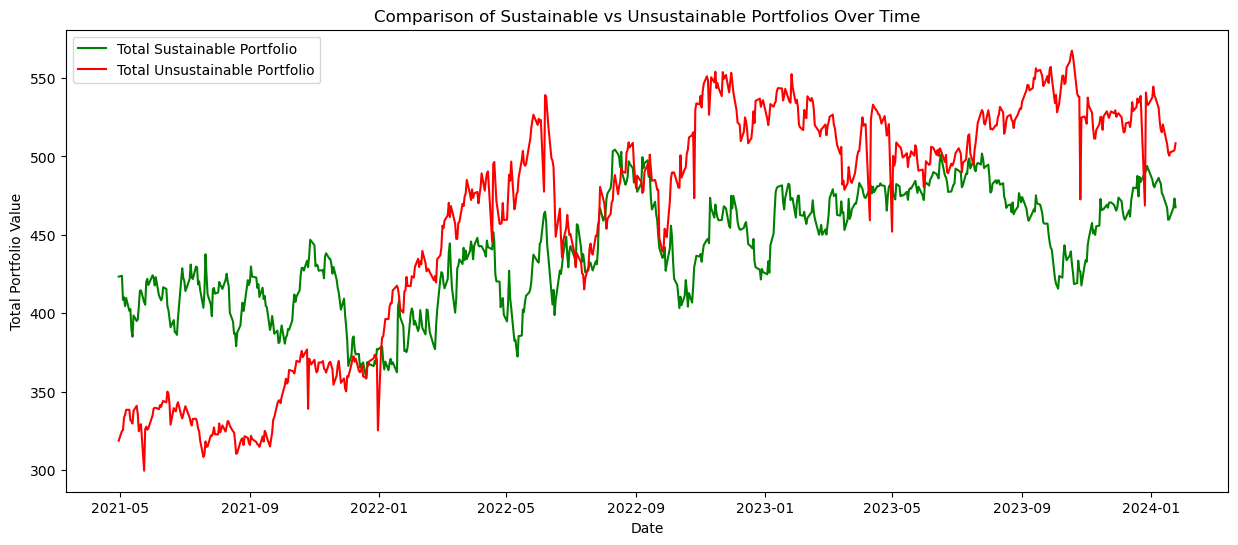

In [34]:
# Summing the data across columns for both DataFrames
total_sustain = df_sustain.sum(axis=1)
total_unsustain = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data for both DataFrames
plt.plot(total_sustain.index, total_sustain, label='Total Sustainable Portfolio', color='green')
plt.plot(total_unsustain.index, total_unsustain, label='Total Unsustainable Portfolio', color='red')

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Comparison of Sustainable vs Unsustainable Portfolios Over Time')
plt.legend()

# Displaying the plot
plt.show()

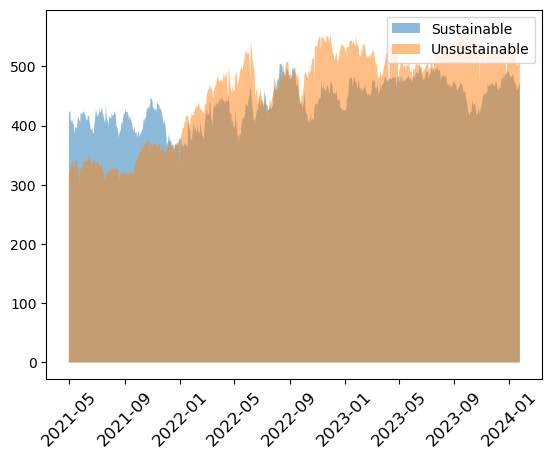

In [42]:
#An area plot can be used to display the cumulative values over time, showing how each portfolio's total value grows.
#This can be particularly effective in highlighting the growth difference between the two portfolios.

plt.fill_between(total_sustain.index, total_sustain, label='Sustainable', alpha=0.5)
plt.fill_between(total_unsustain.index, total_unsustain, label='Unsustainable', alpha=0.5)

# Improving the X-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tick_params(axis='x', labelsize=12)  # Decrease font size of labels 
# Displaying the plot
plt.legend()
plt.show()


In [44]:
# Bar Chart for Comparing Specific Intervals
monthly_sustain = df_sustain.resample('M').mean()
monthly_unsustain = df_unsustain.resample('M').mean()


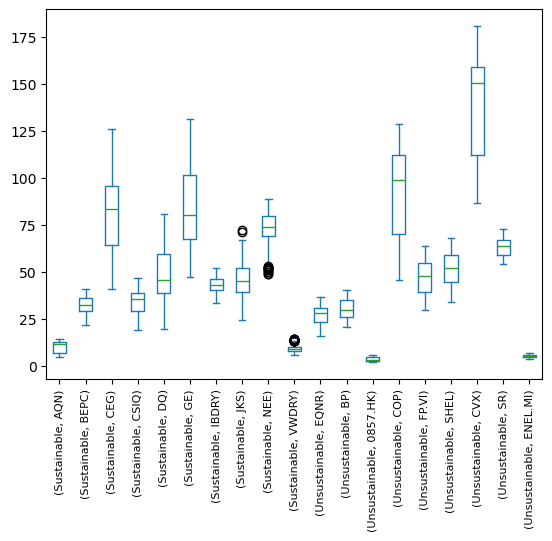

In [50]:
#Box Plot for Distribution Analysis
combined_data = pd.concat([df_sustain, df_unsustain], axis=1, keys=['Sustainable', 'Unsustainable'])

# Creating the box plot
ax = combined_data.plot(kind='box')

# Adjusting the X-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels by 45 degrees
ax.tick_params(axis='x', labelsize=8)  # Decrease font size of labels to 8

# Displaying the plot
plt.show()

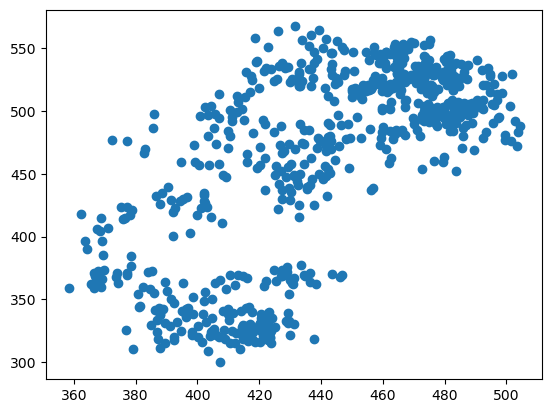

In [38]:
#?? what is the point of this chart?? -->> Delete?
#Scatter Plot for Correlation Analysis
plt.scatter(df_sustain.sum(axis=1), df_unsustain.sum(axis=1))

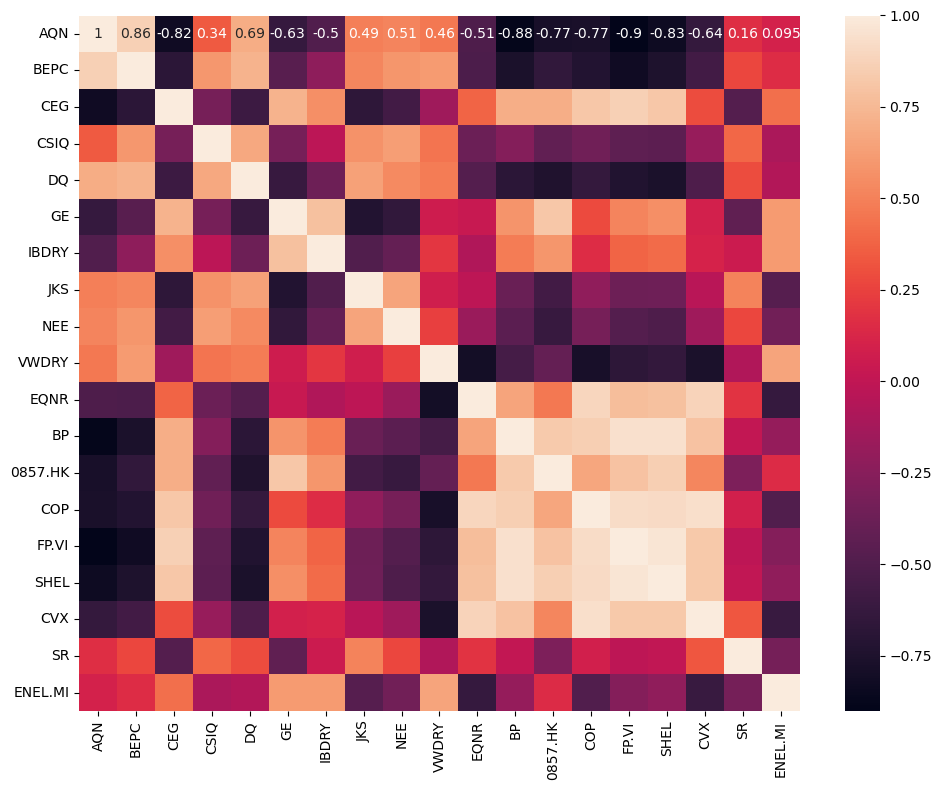

In [52]:
#Heatmap for Correlation Between Stocks
correlation_matrix = pd.concat([df_sustain, df_unsustain], axis=1).corr()

# Increase the figure size
plt.figure(figsize=(10, 8)) # You may adjust these values as needed

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True)

# Adjust layout to make room for the annotations
plt.tight_layout() 

# Show the plot
plt.show()


<Axes: xlabel='Date'>

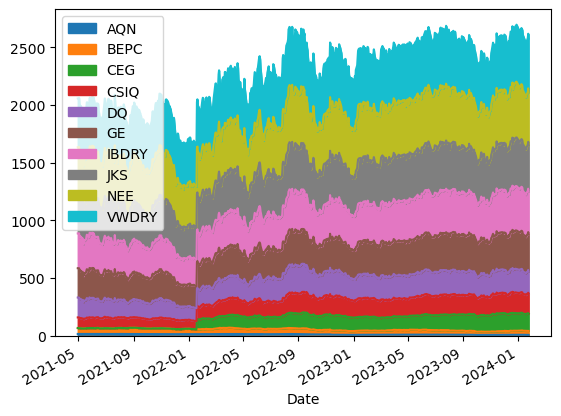

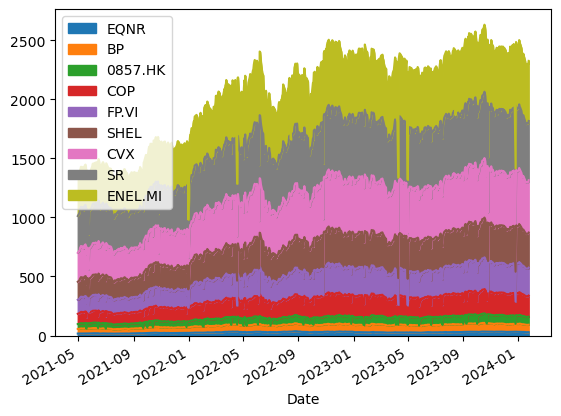

In [53]:
# Stacked Line or Area Chart for Portfolio Composition
df_sustain.cumsum(axis=1).plot(kind='area')
df_unsustain.cumsum(axis=1).plot(kind='area')


#### Analysis at this point in time 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

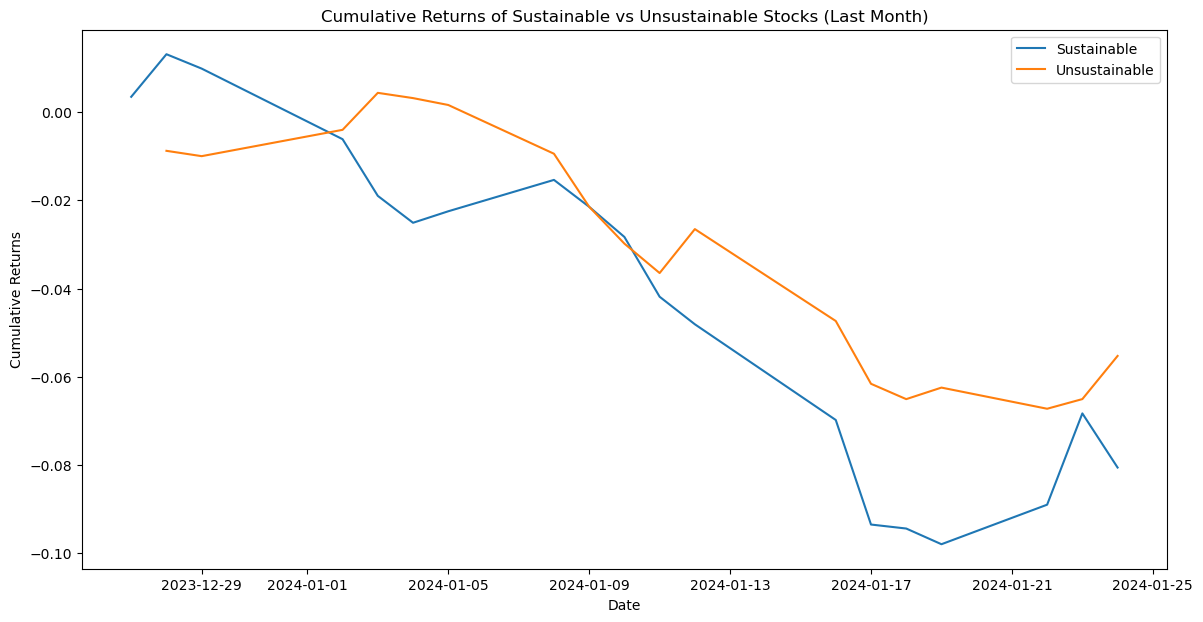

In [58]:
# Updated function to get the last month of stock data
def get_stock_data_last_month(tickers, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=30)  # Set to 30 days for the last month
    
    df = pd.DataFrame()
    
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        df[ticker] = data[info_type]
    
    return df

# Define the information type you are interested in
info_type = 'Close'  # Assume we are interested in the closing prices

# Fetch the stock data for the last month for sustainable and unsustainable companies
sustainable_data_last_month = get_stock_data_last_month(stocks_sustainable, info_type)
unsustainable_data_last_month = get_stock_data_last_month(stocks_unsustainable, info_type)

# Here you can perform your analysis on the data
# For example, you could calculate and compare the average closing price for both groups
sustainable_avg_close = sustainable_data_last_month.mean(axis=0)
unsustainable_avg_close = unsustainable_data_last_month.mean(axis=0)

# Or calculate daily returns and then the cumulative returns for the last month
sustainable_daily_returns = sustainable_data_last_month.pct_change().dropna()
unsustainable_daily_returns = unsustainable_data_last_month.pct_change().dropna()
sustainable_cumulative_returns = (1 + sustainable_daily_returns).cumprod() - 1
unsustainable_cumulative_returns = (1 + unsustainable_daily_returns).cumprod() - 1

# Visualization - Compare the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(sustainable_cumulative_returns.mean(axis=1), label='Sustainable')
plt.plot(unsustainable_cumulative_returns.mean(axis=1), label='Unsustainable')
plt.title('Cumulative Returns of Sustainable vs Unsustainable Stocks (Last Month)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

